<a href="https://colab.research.google.com/github/CelestineAkpanoko/Data-analysis-with-python/blob/main/task/myserviceagent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libaries for cleaning and exploration

In [214]:
# importing liberies and setting files path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline
import seaborn as sns
palette=sns.color_palette('mako')
sns.set(palette=palette)
import re
pd.set_option('display.max_columns', None)
file_train = '/content/drive/MyDrive/Colab Notebooks/c_nlp/Corona_NLP_train.csv'
file_test = '/content/drive/MyDrive/Colab Notebooks/c_nlp/Corona_NLP_test.csv'

## Loading the file and saving a copy
At the initial stage of loading the file, I encountered and encoding error because the datasets do not have a generic encoding method. I used the latin1 encoding to get passed that face. Also, a copy of the original file is saved which can be used for retraining.

In [215]:
#read data and concatenate dataset
df_train = pd.read_csv(file_train, encoding= 'latin1')
df_test = pd.read_csv(file_test, encoding= 'latin1')

In [216]:
train = df_train.copy()
test = df_test.copy()

In [217]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [218]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# About the dataset
The datasets include six columns that hold the data information. Because of privacy concerns, the UserName and ScreenName have been encrypted. The tweets contain mentions and hashtags, which must be cleaned in order for the models to better comprehend the statistical link between the essential elements. The sentiment column comprises five separate classifications, which can be remapped into three for better statistical comprehension. The other columns show the timeframe of the tweets as well as the location from which the tweets were twitted.

In [219]:
# Concatenate the datasets by appending the train dataset to the test
df = pd.concat([test, train])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


# Understanding of the data and fixing some errors

Because the variables that will have the most impact on how the models decide the classes are non-integers, data preparation activities must be performed prior to training and testing the models.

In [220]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

There are a massive 9424 missing records in the location column. Filling in the blanks with the most frequent place won't work since the missing data are too many.

In [221]:
df['Location'].value_counts()[:60]

United States              603
London, England            568
London                     565
New York, NY               429
Washington, DC             411
United Kingdom             355
Los Angeles, CA            314
India                      283
UK                         246
USA                        243
Australia                  236
Canada                     220
England, United Kingdom    201
Toronto, Ontario           189
California, USA            179
San Francisco, CA          171
Chicago, IL                170
Global                     164
New York, USA              156
Boston, MA                 156
Atlanta, GA                145
New Delhi, India           140
New York                   132
Texas, USA                 115
Mumbai, India              114
Toronto                    112
Austin, TX                 109
Worldwide                  107
Houston, TX                107
Los Angeles                105
London, UK                 102
Lagos, Nigeria             101
New York

Because several of the places are in the same geolocation, the location information was separated and combined. The datasets also exhibit significant representational bias. The majority of the data gathered for a worldwide distortion is inside just few geopolitical zones, with Africa having minimal representation. Individual tweet sentiment classes were most likely affected by different ideas, government policies, religious views, and so on.

In [222]:
#split location into words
df['Location'] = df['Location'].str.split(",").str[0]
df['Location'].value_counts()[:60]

London            1335
New York           767
United States      605
Washington         556
Los Angeles        455
Toronto            411
United Kingdom     361
India              293
Chicago            284
England            271
UK                 260
USA                252
Australia          241
California         238
San Francisco      230
Canada             228
Melbourne          218
Sydney             213
Boston             211
New Delhi          206
Mumbai             206
Atlanta            185
Texas              169
Global             165
Houston            165
Austin             146
Lagos              138
Seattle            136
Florida            135
Nairobi            126
Dallas             126
Philadelphia       126
Manchester         122
Vancouver          119
New Jersey         112
San Diego          110
Scotland           109
New York City      108
Worldwide          107
Denver              98
Dubai               97
Earth               93
Singapore           92
Ottawa     

In [223]:
df['Sentiment'].value_counts()

Positive              12369
Negative              10958
Neutral                8332
Extremely Positive     7223
Extremely Negative     6073
Name: Sentiment, dtype: int64

Positive > Negative > Neutral, and the categories are remapped to reflect this stance entirely. And also, removed the UserName and ScreenName columns. 

In [224]:
df = df[['Location', 'OriginalTweet', 'Sentiment']]
df['Sentiment'] = df['Sentiment'].str.replace('Extremely Positive', 'Positive')
df['Sentiment'] = df['Sentiment'].str.replace('Extremely Negative', 'Negative')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Replaced UK with United Kingdom and United States with USA

In [225]:
df['Location'] = df['Location'].str.replace('USA', 'United States')
df['Location'] = df['Location'].str.replace('UK', 'United Kingdom')

# Visual representation of the dataset

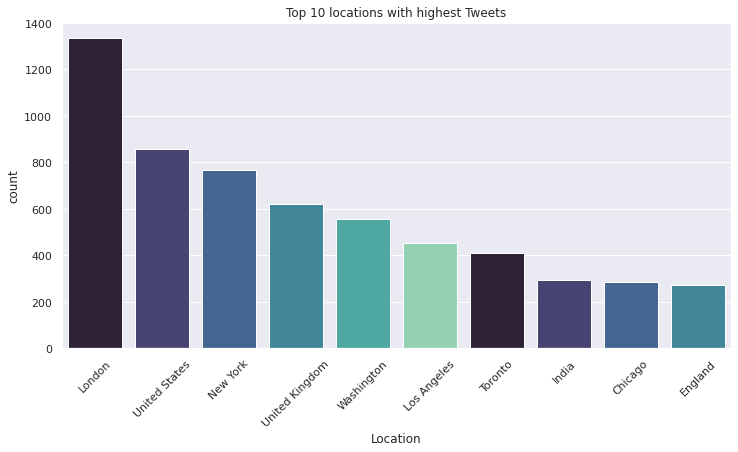

In [226]:
#Top 10 locations that had the highest tweets
plt.figure(figsize=(12,6))
plt.title('Top 10 locations with highest Tweets')
countries =sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index[:10], palette=palette)
countries.set_xticklabels(countries.get_xticklabels(), rotation=45)
plt.show() 

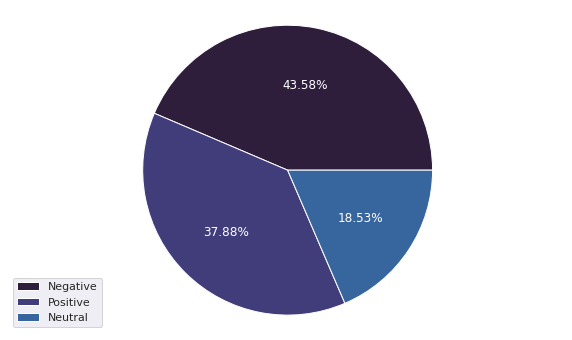

In [227]:
#Pie Chart for the Sentiments Percentage 
plt.figure(figsize=(10,6))
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].unique(), autopct='%.2f%%', textprops={'color':"w"})
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

Insight from the overall data, negative tweets dominates the chart. 

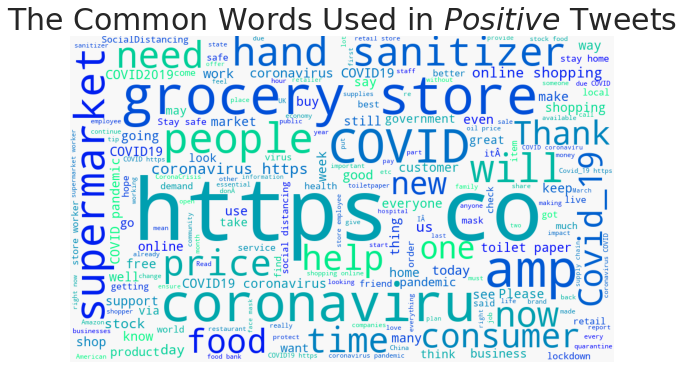

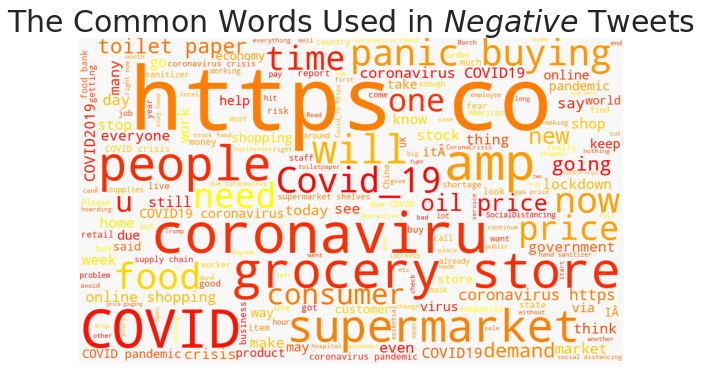

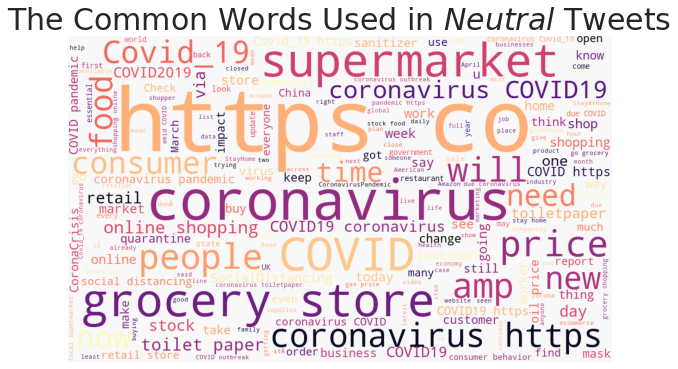

In [228]:
#WordCloud for the Sentiments
from wordcloud import WordCloud
for label, cmap in zip(['Positive', 'Negative', 'Neutral'],
                       ['winter', 'autumn', 'magma', 'mako']):
    text = df.query('Sentiment == @label')['OriginalTweet'].str.cat(sep=' ')
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    print()
    plt.title(f"The Common Words Used in ${label}$ Tweets", size=30)
    plt.show()

# Data Pre-processing and Processing

The NaN values in the location column is filled with Unknown since the locations are not known

In [229]:
df['Location'].fillna('Unknown', inplace=True)

The sentiment categories are recategorized into 3 to improve the accuracy of the classifiers.

Negative: 0, Neutral: 1, Positive: 2

In [230]:
df['Sentiment'] = df['Sentiment'].map({'Neutral':1, 'Positive':2, 'Negative':0})

The stopwords are a collection of words that are extremely prevalent yet give no usable information in most text analysis algorithms.

NLTK (Natural Language Toolkit) comes with a list of 40 stop words by default, including "a", "an", "the", "of", "in", and so on.

In [237]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [238]:
stopWord = stopwords.words('english')

In [239]:
import re

def clean_data(data):
    data = re.sub(r'http\S+', " ", data)
    data = re.sub(r'@\w+',' ',data)
    data = re.sub(r'#\w+', ' ', data)
    data = re.sub(r'\d+', ' ', data)
    data = re.sub('r<.*?>',' ', data)
    data = data.split()
    data = " ".join([word for word in data if not word in stopWord])
    
    return data

In [240]:
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: clean_data(x))

In [241]:
df.head()

,Location,OriginalTweet,Sentiment
0,NYC,TRENDING: New Yorkers encounter empty supermar...,0
1,Seattle,"When I find hand sanitizer Fred Meyer, I turne...",2
2,Unknown,Find protect loved ones . ?,2
3,Chicagoland,buying hits City anxious shoppers stock food&a...,0
4,Melbourne,One week everyone buying baby milk powder next...,1


In [242]:
df = df[['OriginalTweet', 'Sentiment']]

The libraries and frameworks required for further data processing, building a logistic regression model, and evaluating it are listed below.

In [243]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

As a result of machine learning models discovering statistical relationships, the data is tokenized and vectorized as part of the data preparation procedure.

In [246]:
nltk.download('punkt')
nltk.download('wordnet')
df['Corpus'] = [nltk.word_tokenize(text) for text in df.OriginalTweet]
lemma = nltk.WordNetLemmatizer()
df.Corpus = df.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
df.Corpus = df.apply(lambda x: " ".join(x.Corpus),axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [247]:
df.head()

,OriginalTweet,Sentiment,Corpus
0,TRENDING: New Yorkers encounter empty supermar...,0,TRENDING : New Yorkers encounter empty superma...
1,"When I find hand sanitizer Fred Meyer, I turne...",2,"When I find hand sanitizer Fred Meyer , I turn..."
2,Find protect loved ones . ?,2,Find protect loved one . ?
3,buying hits City anxious shoppers stock food&a...,0,buying hit City anxious shopper stock food & a...
4,One week everyone buying baby milk powder next...,1,One week everyone buying baby milk powder next...


Split dataset back for training and testing

In [248]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

In [249]:
train.head()

,OriginalTweet,Sentiment,Corpus
31123,When I find Paracetamol pharmacy &amp; local s...,2,When I find Paracetamol pharmacy & amp ; local...
20884,The Federal Government allocated funds Why mon...,2,The Federal Government allocated fund Why mone...
24094,Will new consumer habits caused coronavirus (C...,1,Will new consumer habit caused coronavirus ( C...
28944,"""This moment going grocery store, going pharma...",2,"`` This moment going grocery store , going pha..."
2673,needs introduce rationing coupons! Now! No foo...,0,need introduce rationing coupon ! Now ! No foo...


In [250]:
test.head()

,OriginalTweet,Sentiment,Corpus
17,"When youÂre stockpiling food &amp; supplies, ...",1,"When youÂre stockpiling food & amp ; supply ,..."
37,ItÂs even food... actual heck?? I news people...,1,ItÂs even food ... actual heck ? ? I news peo...
168,So new housemmate moving place tomorrow I get ...,2,So new housemmate moving place tomorrow I get ...
171,"Since , I online shopping stuff &amp; limiting...",2,"Since , I online shopping stuff & amp ; limiti..."
195,?People CDC finally says prepared shelter-in-p...,2,? People CDC finally say prepared shelter-in-p...


A validation set is created by splitting the train set.

In [251]:
XTrain = train.Corpus
yTrain = train.Sentiment

XTest = test.Corpus
yTest = test.Sentiment

XTrain, XVal, yTrain, yVal = train_test_split(XTrain, yTrain, test_size=0.2,random_state=42)

In [252]:
XTrain.shape, XVal.shape, yTrain.shape, yVal.shape, XTest.shape, yTest.shape

((28771,), (7193,), (28771,), (7193,), (7815,), (7815,))

In [254]:
vectorizer = CountVectorizer(stop_words='english',ngram_range=(1,2),min_df=5).fit(df.Corpus)

XTrainVec = vectorizer.transform(XTrain)
XValVec = vectorizer.transform(XVal)
XTestVec = vectorizer.transform(XTest)

Logistic Regression Performance Evaluation

A Logistic Regression model analyzes a weighted sum of the input features, includes bias, rather than presenting the result instantly, it presents the logistic of that result.

In [259]:
logReg = LogisticRegression(random_state=50)

Cross-validation provides not only an estimate of model performance, but also a measure of how exact this estimate is (such as its standard deviation). However, because cross-validation necessitates training models in several iterations, it is not always feasible.

In [260]:
cross_val_score(LogisticRegression(random_state=50),
                XTrainVec, yTrain, cv=15, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   33.3s finished


0.788363569906192

In [261]:
model = logReg.fit(XTrainVec, yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [262]:
print(classification_report(yVal, model.predict(XValVec)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2673
           1       0.70      0.73      0.71      1341
           2       0.84      0.83      0.83      3179

    accuracy                           0.80      7193
   macro avg       0.78      0.79      0.78      7193
weighted avg       0.80      0.80      0.80      7193



Fine Tuning the Logistic Regression Model

In [263]:
penalty = ['l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

logRegGrid = GridSearchCV(logReg, hyperparameters, cv=5, verbose=0)

In [264]:
bestModel = logRegGrid.fit(XTrainVec, yTrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [265]:
# Best hyperparameters combination

print('Best Penalty:', bestModel.best_estimator_.get_params()['penalty'])
print('Best C:', bestModel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [266]:
# Final Logistic Regression model performance

yPred = bestModel.predict(XTestVec)

In [267]:
print(classification_report(yTest, bestModel.predict(XTestVec)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2929
           1       0.69      0.72      0.71      1421
           2       0.84      0.83      0.84      3465

    accuracy                           0.80      7815
   macro avg       0.78      0.79      0.78      7815
weighted avg       0.80      0.80      0.80      7815



**Precision** is concerned with the precision of positive forecasts.
Precision equals TP/TP + FP.
The number of true positives is denoted by TP, whereas the number of false positives is denoted by FP. Where as **Recall**, also known as sensitivity or true positive rate (TPR), is the proportion of positive cases recognized properly by the classifier. TP / TP + FN = recall. The number of true positives is denoted by TP. The number of false positives is denoted by FP, and the number of false negatives is denoted by FN. However, in this project, the **F1-score** is the preferred metric for assessing the effectiveness of the logistic regression model. The harmonic mean of accuracy and recall is used to get the F1 score. Whereas the conventional mean provides equal weight to all values, the harmonic mean lends substantially greater weight to low values. As a result, the classifier will only earn a high F1 score if it has a high recall and accuracy.

# LONG SHORT TERM MEMORY (LSTM) MODEL

The following are the libraries and frameworks required for additional data processing, building an LSTM model, and evaluating it.

In [326]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [327]:
lines = []
for line in train['Corpus']:
    lines.append(line)
    
len(lines)

35964

In [328]:
# Number of words to consider as features
tokenizer = Tokenizer(num_words=5000, lower=True) 
tokenizer.fit_on_texts(train['Corpus'].values)
wordIndex = len(tokenizer.word_index) + 1
print('Found %s unique tokens.' % (wordIndex))

Found 31265 unique tokens.


In [329]:
# Turns the lists of integers into a 2D integer tensor of shape (numWords, maxlen)
XTrain = tokenizer.texts_to_sequences(train['Corpus'].values)
XTrain = pad_sequences(XTrain, maxlen=30) # Cuts off the texts after this number of words

XTest = tokenizer.texts_to_sequences(test['Corpus'].values)
XTest = pad_sequences(XTest, maxlen=30)

The tokenizer chooses the top 5000 words. The sequences are padded such that they are all 30 in length.

In [330]:
XTrain.shape, XTest.shape

((35964, 30), (7815, 30))

In [331]:
yTrain = to_categorical(train['Sentiment'], 3)
yTest = to_categorical(test['Sentiment'], 3)

NEURAL NETWORK

The neural network is made up of one embedding layer and one LSTM layer of 200 units. To prevent the model from overfitting, a dropout layer is included for regularization. The neural architecture concludes with a thick layer composed of three units that create the output or prediction classes. Because this is a single label, multi-class issue, softmax activation is utilized.

The Embedding layer is a notable or distinguishing characteristic of this neural architecture. The Embedding layer may be thought of as a dictionary that converts integer indices (which represent individual words) to dense vectors. It accepts numbers as input, searches an internal dictionary for these integers, and outputs the related vectors. It's just a dictionary search.

In [354]:
model= models.Sequential()
model.add(layers.Embedding(wordIndex, 128, input_length=30))
model.add(layers.LSTM(200))
model.add(Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))

In [355]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 30, 128)           4001920   
                                                                 
 lstm_11 (LSTM)              (None, 200)               263200    
                                                                 
 dropout_11 (Dropout)        (None, 200)               0         
                                                                 
 dense_14 (Dense)            (None, 3)                 603       
                                                                 
Total params: 4,265,723
Trainable params: 4,265,723
Non-trainable params: 0
_________________________________________________________________


In [356]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=['accuracy'])

#Adding an early stopping
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

The callback parameter provided checks the validation loss and terminates the training process after 10 epochs if there is no obvious progress. It will also restore the model's best version as recorded during training.

In [357]:
#Fit the RNN
history = model.fit(XTrain ,yTrain, validation_split=0.2, batch_size=250, epochs=100, callbacks=[es])

Epoch 1/100
116/116 [==============================] - 47s 378ms/step - loss: 0.9073 - accuracy: 0.6044 - val_loss: 0.8327 - val_accuracy: 0.6814
Epoch 2/100
116/116 [==============================] - 42s 365ms/step - loss: 0.4279 - accuracy: 0.8532 - val_loss: 0.5113 - val_accuracy: 0.8069
Epoch 3/100
116/116 [==============================] - 42s 362ms/step - loss: 0.3392 - accuracy: 0.8873 - val_loss: 0.4540 - val_accuracy: 0.8476
Epoch 4/100
116/116 [==============================] - 42s 363ms/step - loss: 0.2812 - accuracy: 0.9054 - val_loss: 0.5171 - val_accuracy: 0.8397
Epoch 5/100
116/116 [==============================] - 42s 364ms/step - loss: 0.2215 - accuracy: 0.9240 - val_loss: 0.5805 - val_accuracy: 0.8379
Epoch 6/100
116/116 [==============================] - 42s 363ms/step - loss: 0.1714 - accuracy: 0.9412 - val_loss: 0.6488 - val_accuracy: 0.8227
Epoch 7/100
116/116 [==============================] - 42s 363ms/step - loss: 0.1298 - accuracy: 0.9559 - val_loss: 0.8290 -

Visualizing the Model's Accuracy/Loss between Epochs

Text(0.5, 0.98, 'Accuracy/Loss of the LSTM Sentiment Classifier')

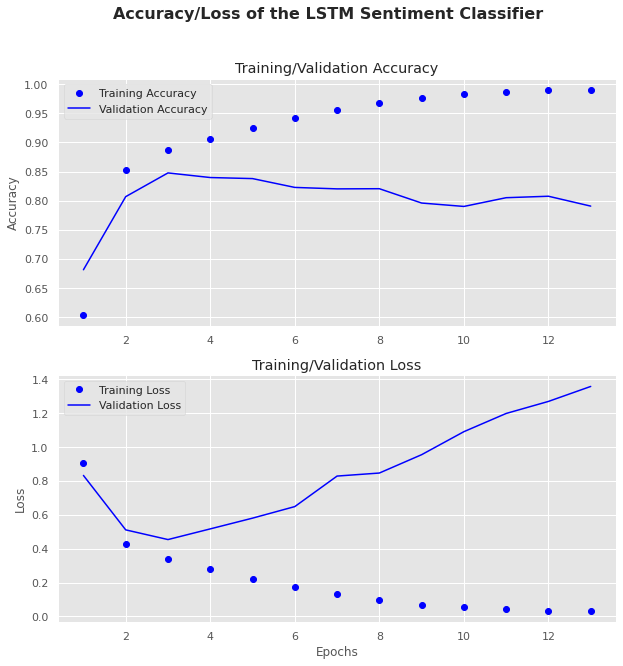

In [358]:
accuracy = history.history['accuracy']
valAccuracy = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plot = ax1.plot(epochs, accuracy, 'bo', label='Training Accuracy')
ax1.plot(epochs, valAccuracy, 'b', label='Validation Accuracy')
ax1.set(title='Training/Validation Accuracy', ylabel='Accuracy')
ax1.legend()

plot = ax2.plot(epochs, loss, 'bo', label='Training Loss')
ax2.plot(epochs, valLoss, 'b', label='Validation Loss')
ax2.set(title='Training/Validation Loss', ylabel='Loss', xlabel='Epochs')
ax2.legend()

fig.suptitle('Accuracy/Loss of the LSTM Sentiment Classifier', fontsize=16, fontweight = 'bold')

The model is still too big. In the absence of new data, overfitting may most likely be mitigated by reducing the number of layers or units in the neural network. Dropout rates can also be increased. The Keras kernel regularizer may also be used to do weight regularization.

In [359]:
results = model.evaluate(XTest, yTest)

245/245 [==============================] - 9s 35ms/step - loss: 0.4379 - accuracy: 0.8569


In [368]:
model.save('./LSTM classifier.h5')
keras.models.load_model('./LSTM classifier.h5')